In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

In [2]:
df = pd.read_csv("CardioVascular.csv")


print("Total Rows: ",df.shape[0])
print("Total Columns : ",df.shape[1])
df.head()


Total Rows:  303
Total Columns :  14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info(memory_usage = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)

In [4]:
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

*************************
.: Sex (Gender) Total :.
*************************


1    207
0     96
Name: sex, dtype: int64

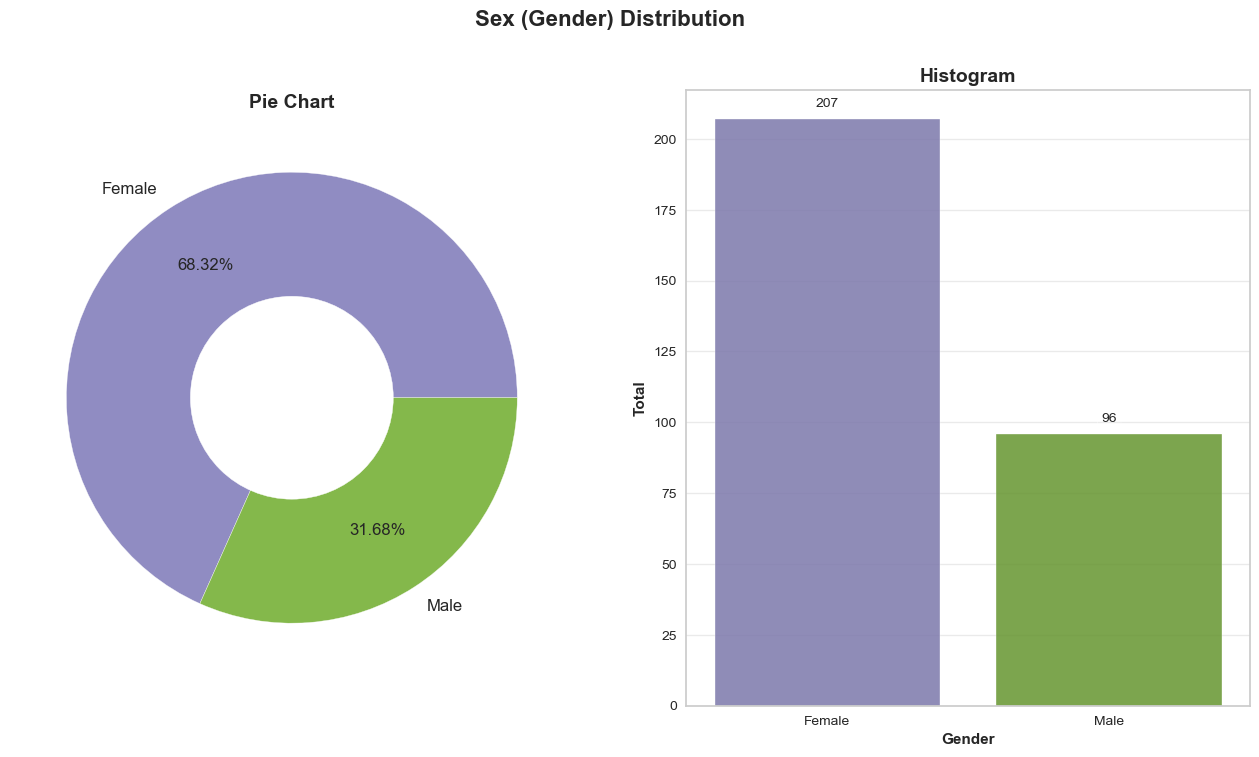

In [5]:
#colors=color_mix[2:4]
labels=['Female', 'Male']
order=df['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
plt.pie(df['sex'].value_counts(), labels=labels,  pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
ax = sns.countplot(x='sex', data=df, order=order,
             alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none',linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df.sex.value_counts(dropna=False)

******************************
.: Chest Pain Type Total :.
******************************


0    143
2     87
1     50
3     23
Name: cp, dtype: int64

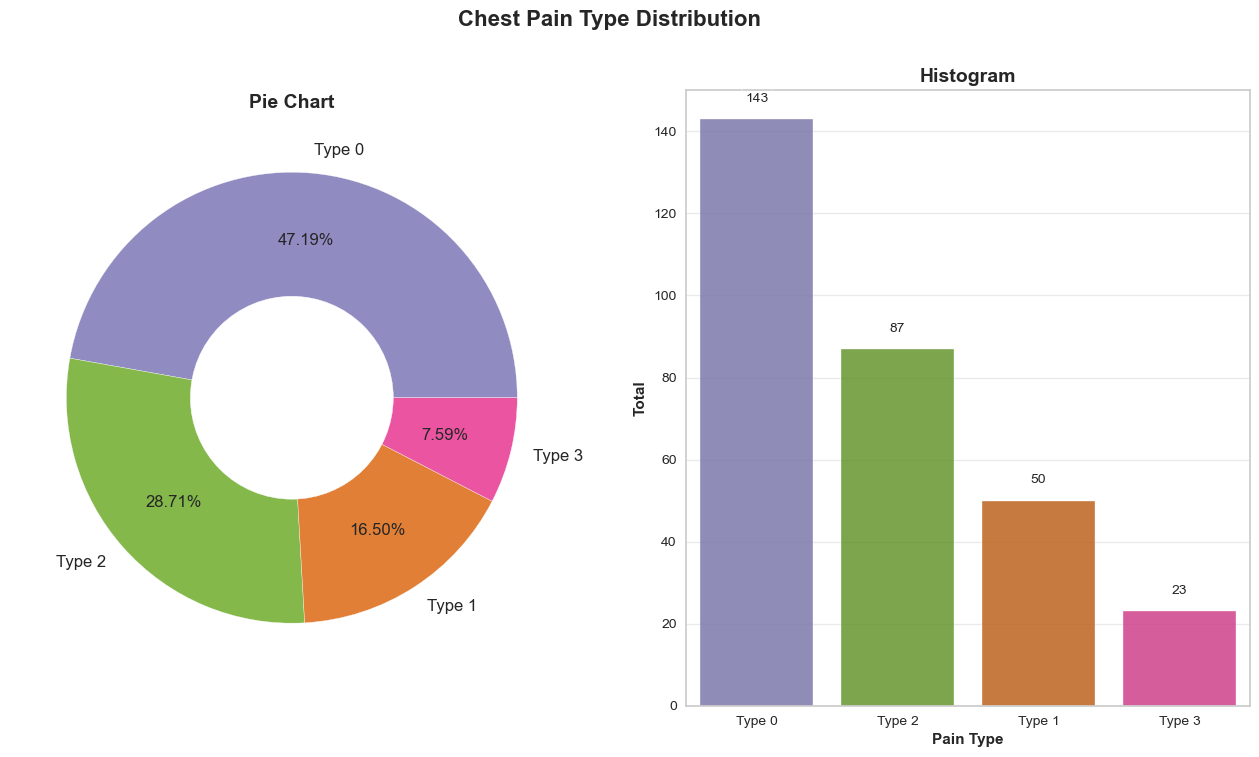

In [6]:
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=df['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif')
plt.pie(df['cp'].value_counts(), labels=labels,  pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='cp', data=df, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif' )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
df.cp.value_counts(dropna=False)

********************************
.: Fasting Blood Sugar Total :.
********************************


0    258
1     45
Name: fbs, dtype: int64

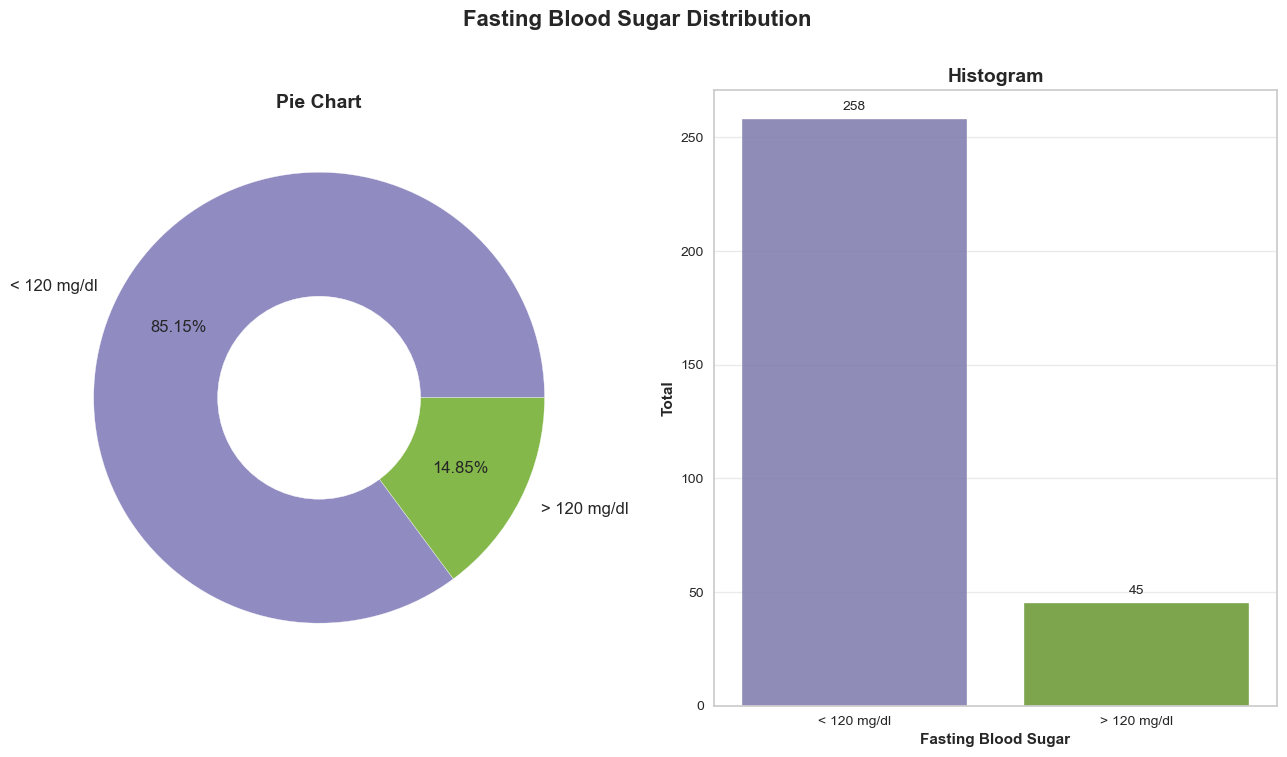

In [7]:
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['fbs'].value_counts(), labels=labels,wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='fbs', data=df, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
df.fbs.value_counts(dropna=False)

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


1    152
0    147
2      4
Name: restecg, dtype: int64

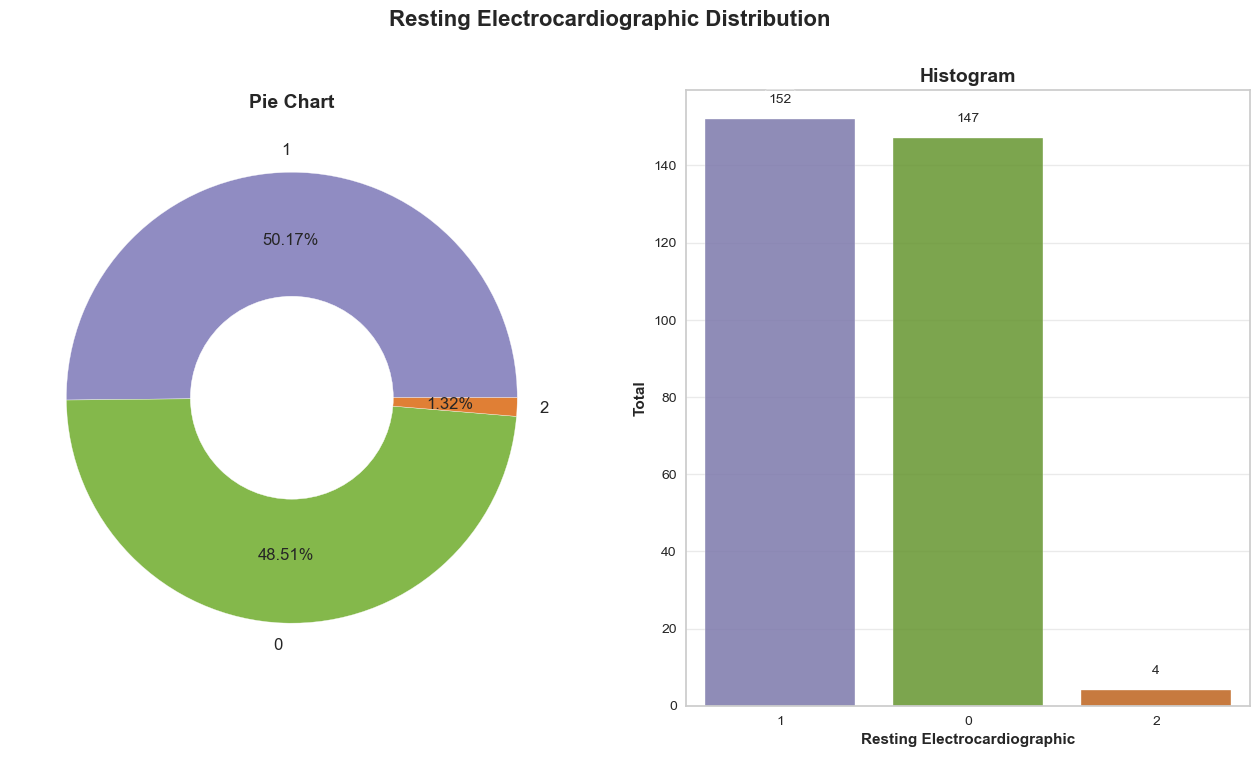

In [8]:
labels=['1', '0', '2']
order=df['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['restecg'].value_counts(), labels=labels,wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='restecg', data=df, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
df.restecg.value_counts(dropna=False)

***********************************
.: Exercise Induced Angina Total :.
***********************************


0    204
1     99
Name: exang, dtype: int64

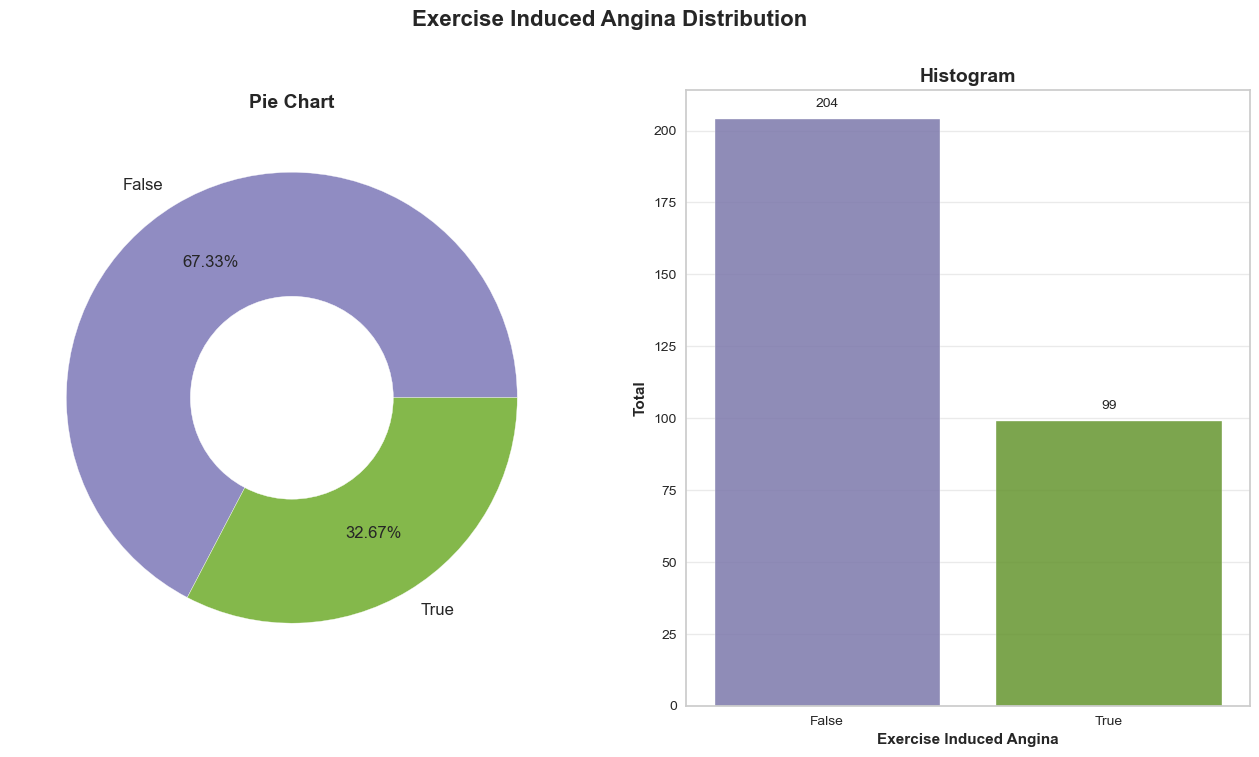

In [9]:
labels=['False', 'True']
order=df['exang'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['exang'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='exang', data=df, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
df.exang.value_counts(dropna=False)

********************
.: Slope Total :.
********************


2    142
1    140
0     21
Name: slope, dtype: int64

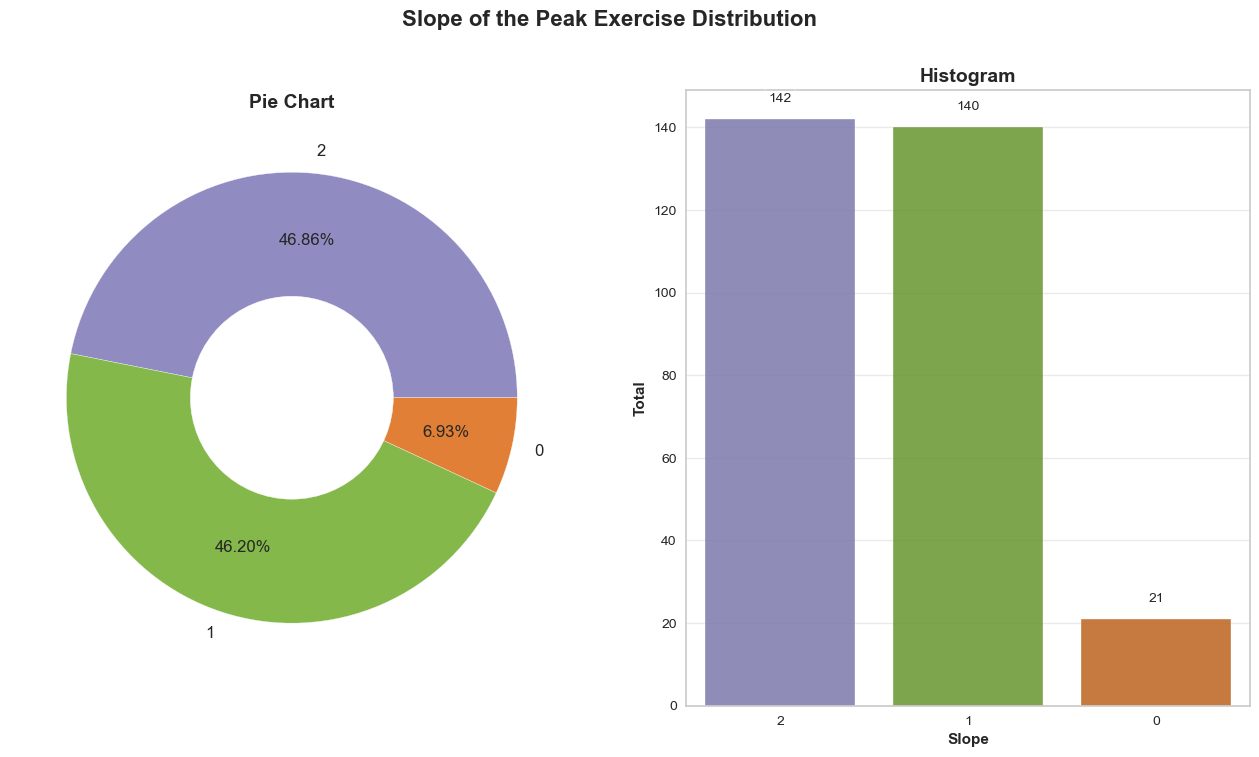

In [10]:
labels=['2', '1', '0']
order=df['slope'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
plt.pie(df['slope'].value_counts(), labels=labels,  
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='slope', data=df, order=order,alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: Slope Total :.'+'\033[0m')
print('*' * 20)
df.slope.value_counts(dropna=False)

****************************************
.: Number of Major Vessels Total :.
****************************************


0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

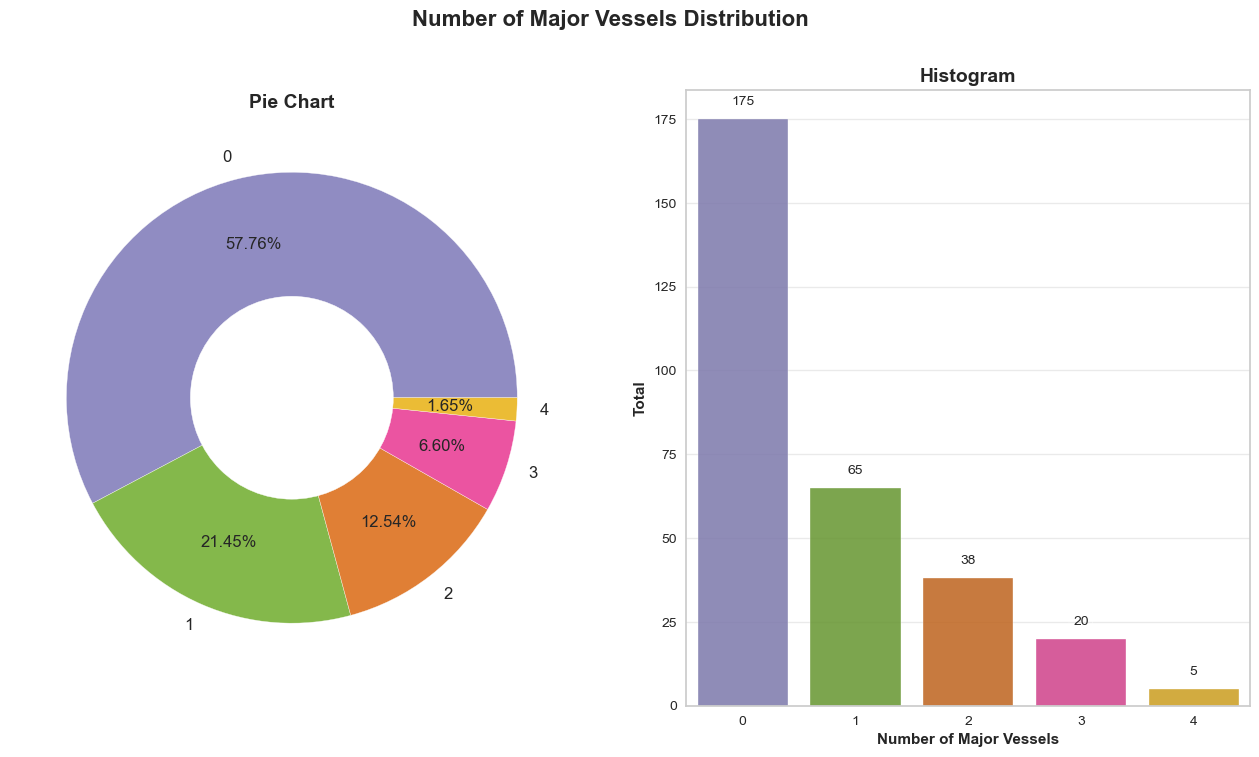

In [11]:
labels=['0', '1', '2', '3', '4']
order=df['ca'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['ca'].value_counts(), labels=labels, 
        wedgeprops=dict(alpha=0.8), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='ca', data=df, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',  linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 40)
print('\033[1m'+'.: Number of Major Vessels Total :.'+'\033[0m')
print('*' * 40)
df.ca.value_counts(dropna=False)

********************
.: "thal" Total :.
********************


2    166
3    117
1     18
0      2
Name: thal, dtype: int64

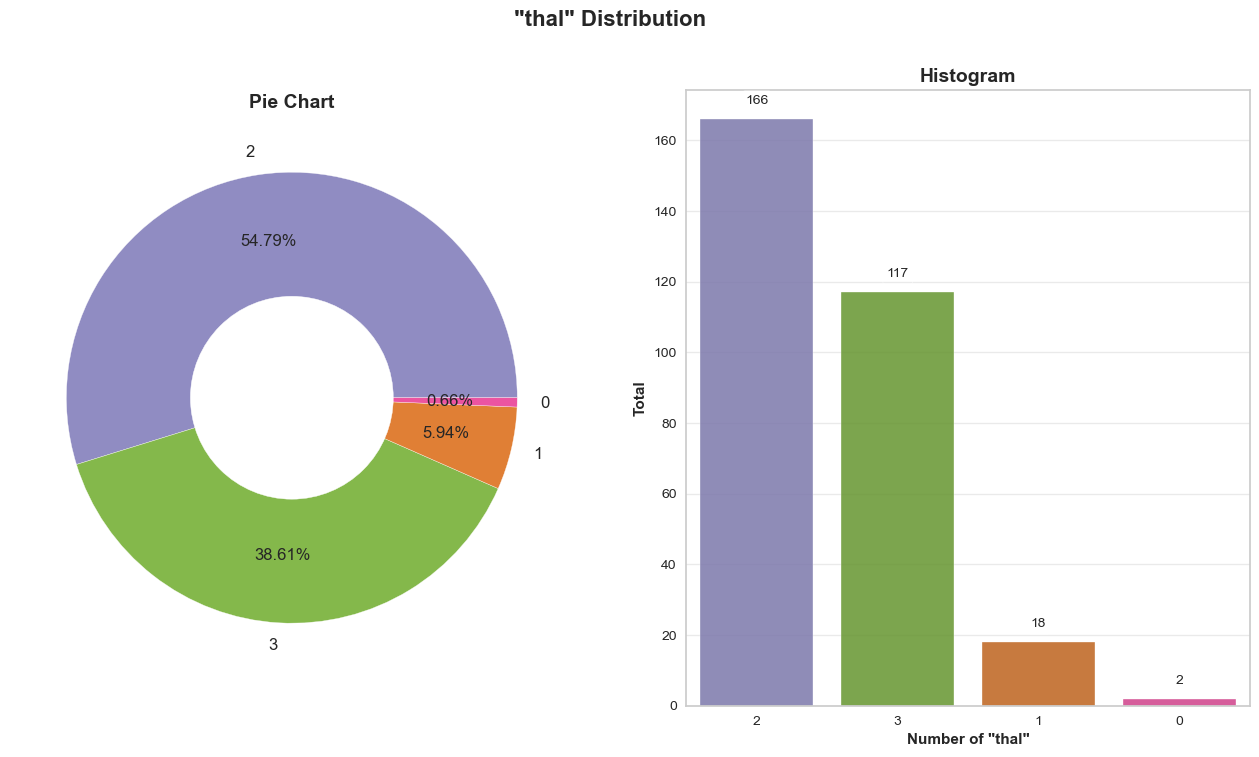

In [12]:
# --- Setting Colors, Labels, Order ---
labels=['2', '3', '1', '0']
order=df['thal'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['thal'].value_counts(), labels=labels, 
        wedgeprops=dict(alpha=0.8, ), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='thal', data=df,  order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',  linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
df.thal.value_counts(dropna=False)

*********************************************
.: CardioVascular Disease Status (target) Total :.
*********************************************


,age,trestbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


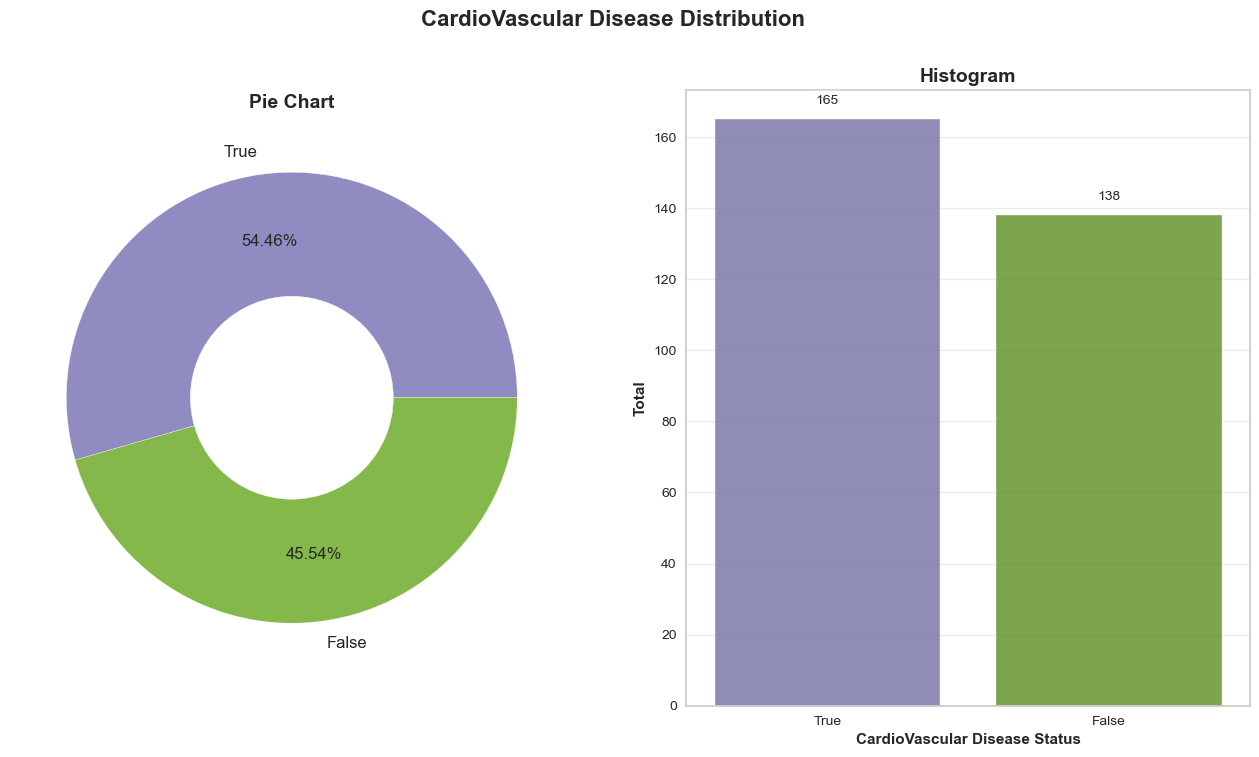

In [13]:
labels=['True', 'False']
order=df['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle(' CardioVascular Disease Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['target'].value_counts(), labels=labels,  
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='target', data=df, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',  linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('CardioVascular Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 45)
print('\033[1m'+'.: CardioVascular Disease Status (target) Total :.'+'\033[0m')
print('*' * 45)
df.target.value_counts(dropna=False)

df.select_dtypes(exclude='object').describe()

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.202
Kurtosis: -0.542




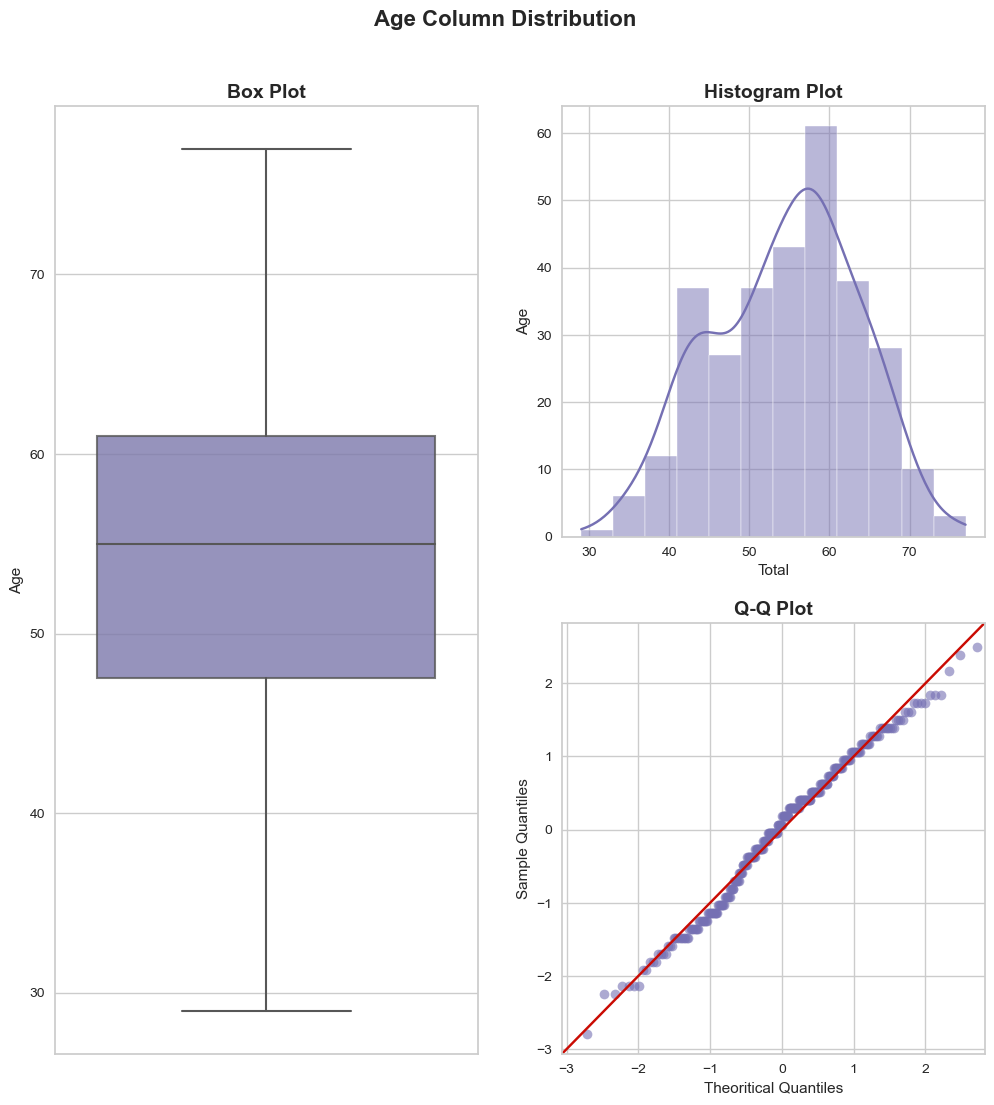

In [14]:
# --- Variable, Color & Plot Size ---
var = 'age'
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif' )
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=df, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

.: Resting Blood Pressure Column Skewness & Kurtosis :.
*******************************************************
Skewness: 0.714
Kurtosis: 0.929




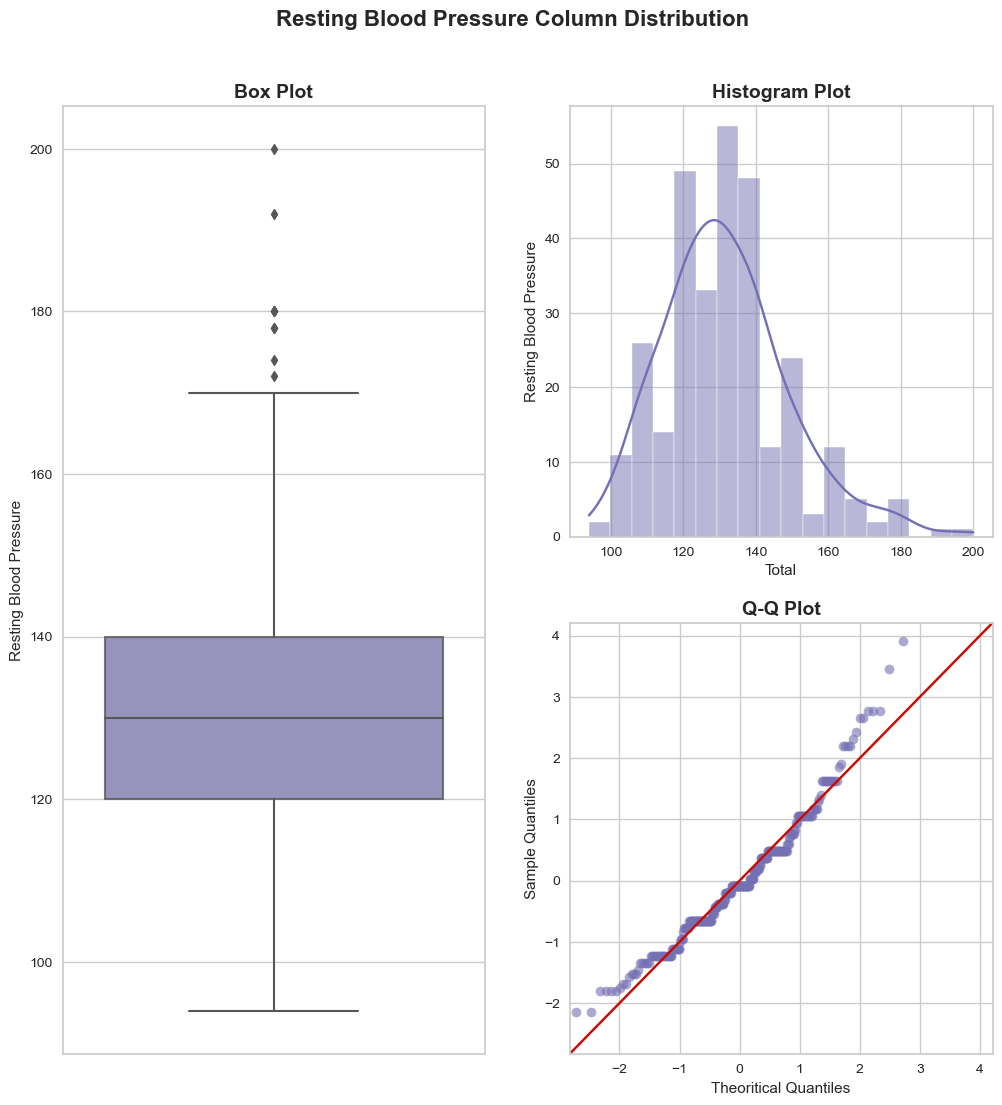

In [15]:
# --- Variable, Color & Plot Size ---
var = 'trestbps'
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 55)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=df, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

plt.show()

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.143
Kurtosis: 4.505




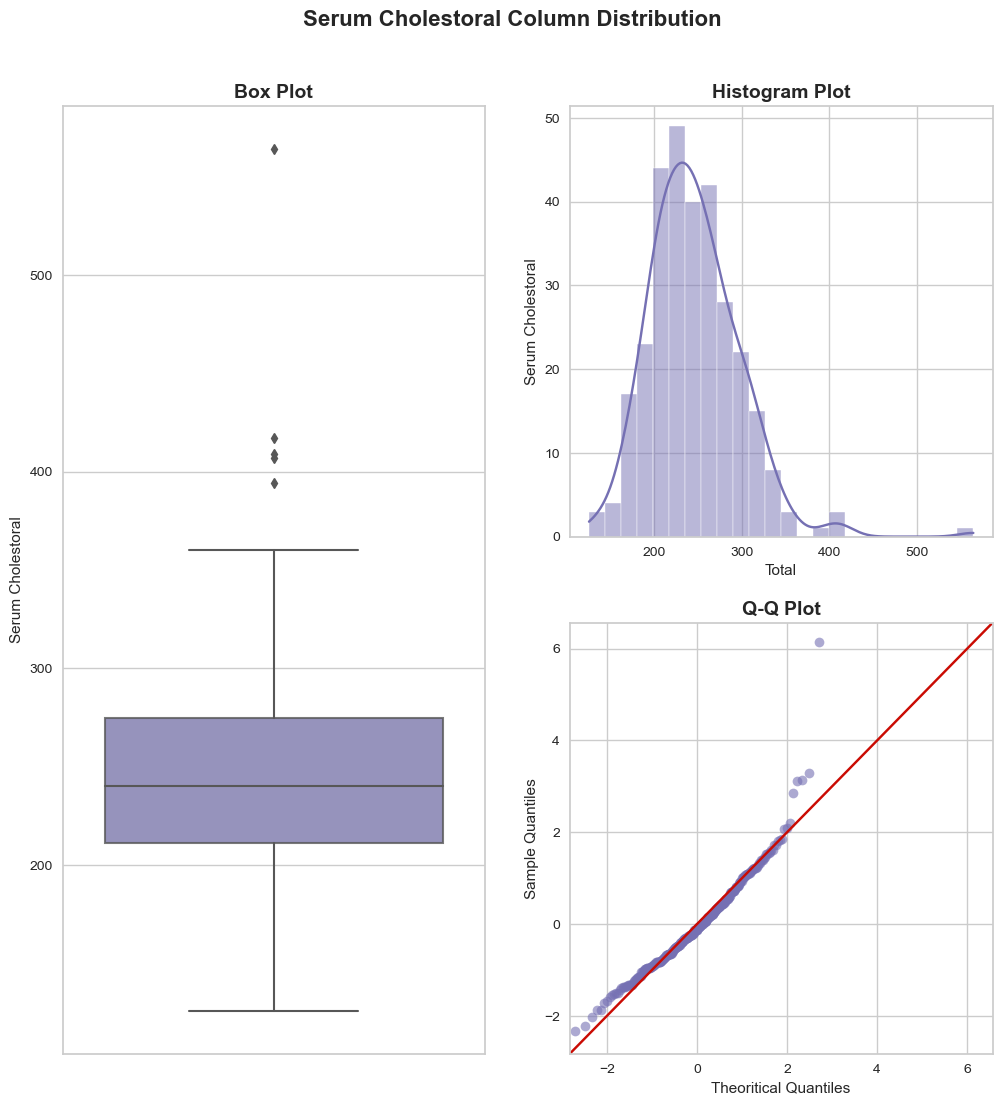

In [16]:
# --- Variable, Color & Plot Size ---
var = 'chol'
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2,alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.boxplot(data=df, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

plt.show()

.: Maximum Heart Rate Column Skewness & Kurtosis :.
**************************************************
Skewness: -0.537
Kurtosis: -0.062




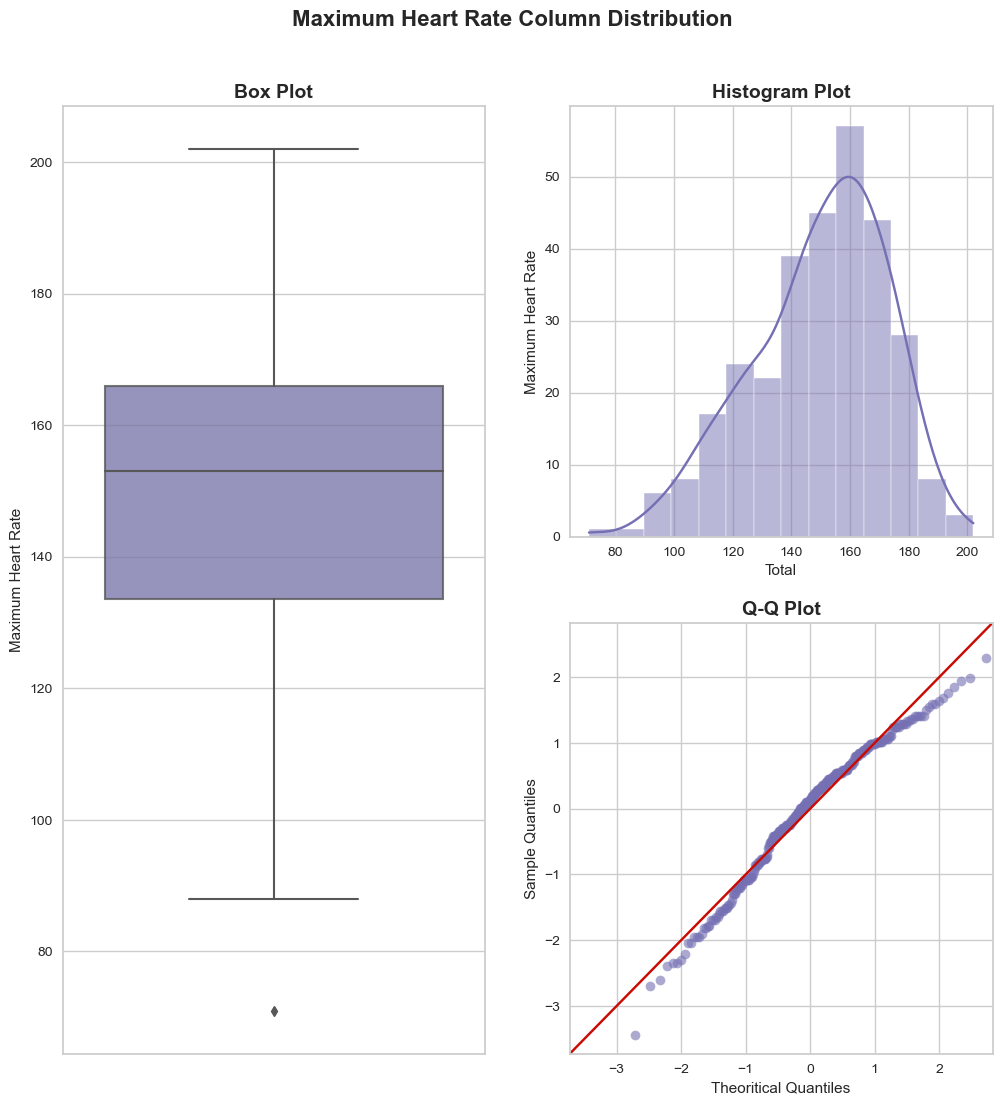

In [17]:
# --- Variable, Color & Plot Size ---
var = 'thalach'
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 50)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')
# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.boxplot(data=df, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.show()

.: "oldpeak" Column Skewness & Kurtosis :.
****************************************
Skewness: 1.270
Kurtosis: 1.576




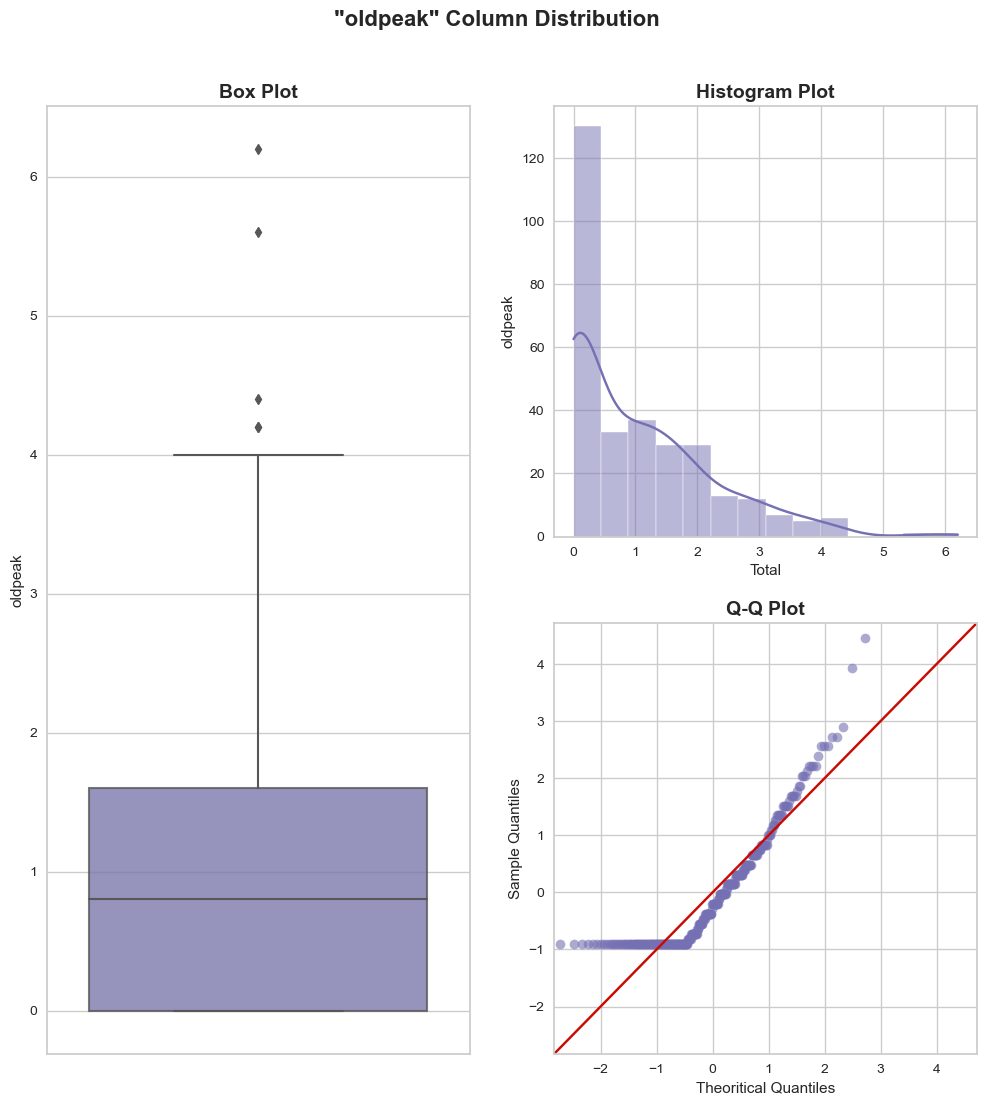

In [18]:
# --- Variable, Color & Plot Size ---
var = 'oldpeak'
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('"oldpeak" Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('oldpeak', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.boxplot(data=df, y=var,  boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

plt.show()

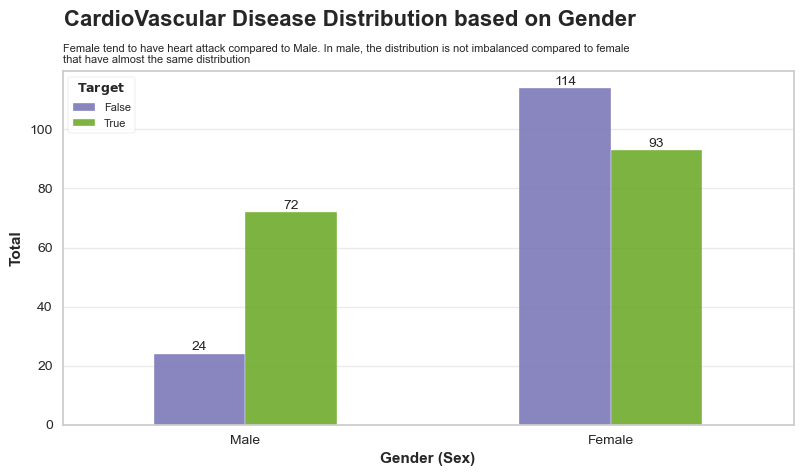

In [19]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(8, 5), alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('CardioVascular Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.title('Female tend to have heart attack compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution', 
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

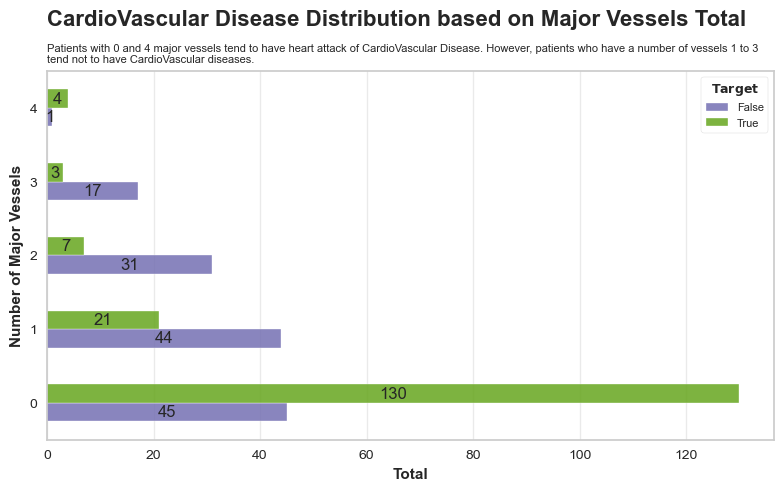

In [20]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df.ca, df.target).plot(kind='barh', figsize=(8, 5),alpha=0.85)
# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('CardioVascular Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')
plt.title('Patients with 0 and 4 major vessels tend to have heart attack of CardioVascular Disease. However, patients who have a number of vessels 1 to 3\ntend not to have CardioVascular diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold')
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

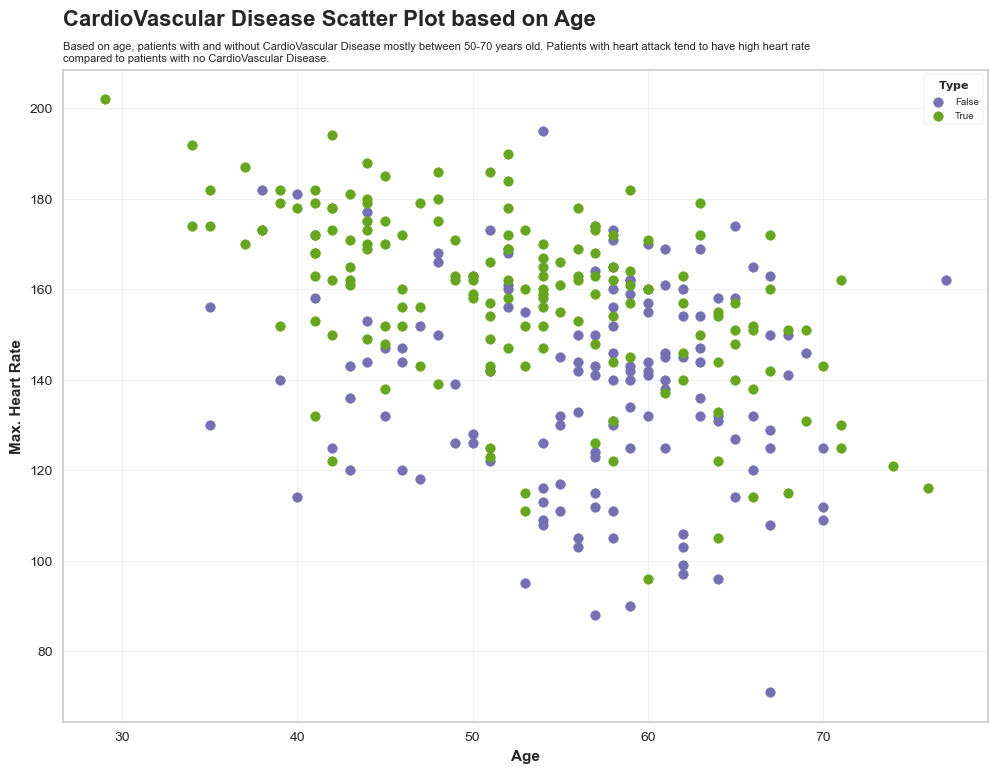

In [21]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('CardioVascular Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.title('Based on age, patients with and without CardioVascular Disease mostly between 50-70 years old. Patients with heart attack tend to have high heart rate\ncompared to patients with no CardioVascular Disease.', 
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif')
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

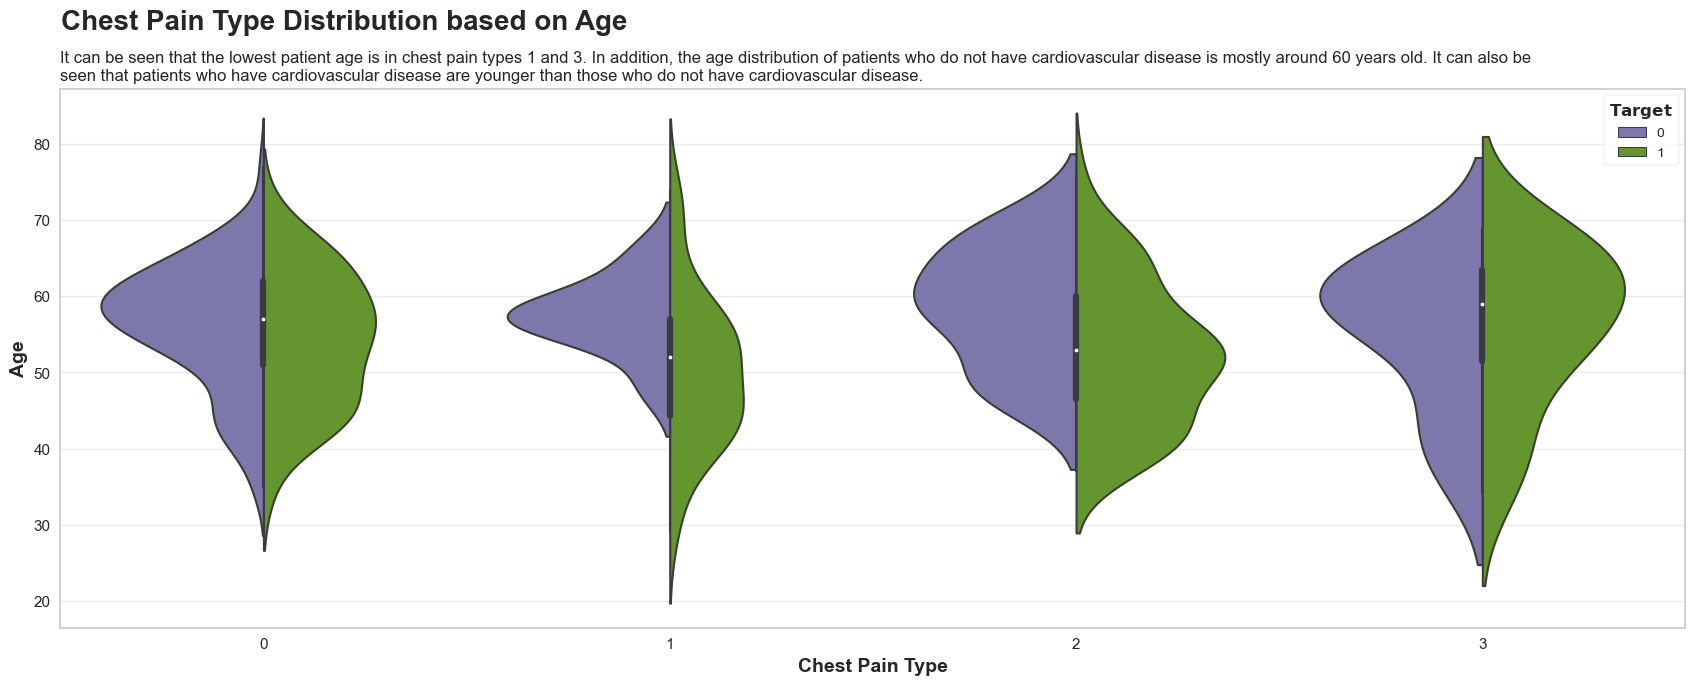

In [22]:
# -- Violin Plot Size & Titles Settings ---
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.suptitle('Chest Pain Type Distribution based on Age', fontweight='heavy', 
             x=0.028, y=0.98, ha='left', fontsize='20', fontfamily='sans-serif')
plt.title('It can be seen that the lowest patient age is in chest pain types 1 and 3. In addition, the age distribution of patients who do not have cardiovascular disease is mostly around 60 years old. It can also be\nseen that patients who have cardiovascular disease are younger than those who do not have cardiovascular disease.', 
          fontsize='12', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Violin Plot based on Type ---
sns.violinplot(x='cp', y='age', hue='target', data=df, ax=ax, boxprops=dict(alpha=0.9), linewidth=1.5, 
               split=True)

# --- Violin Plot Legend & Labels Settings ---
plt.legend(title='$\\bf{Target}$', fontsize='10', title_fontsize='12', frameon=True,
           loc='upper right')
plt.xlabel('Chest Pain Type', fontweight='bold', fontsize='14', 
           fontfamily='sans-serif')
plt.ylabel('Age', fontweight='bold', fontsize='14', fontfamily='sans-serif')
plt.xticks(fontsize='11')
plt.yticks(fontsize='11')
plt.grid(axis='y', alpha=0.4)
plt.show();

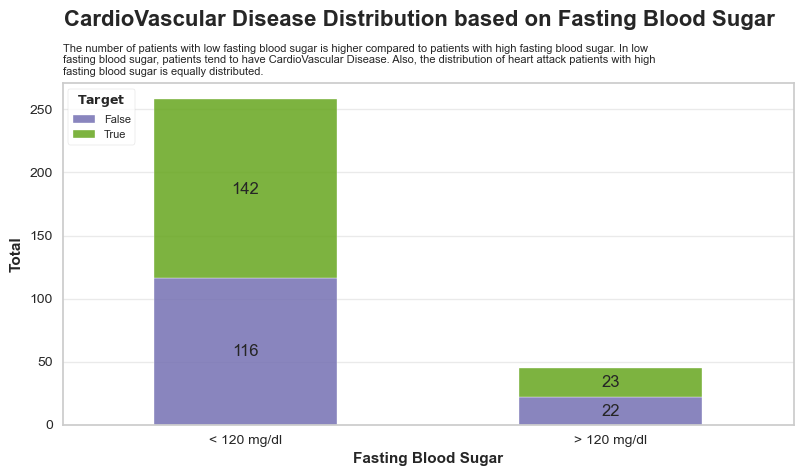

In [23]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['< 120 mg/dl', '> 120 mg/dl']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(8, 5),stacked=True,alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(height), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('CardioVascular Disease Distribution based on Fasting Blood Sugar', 
             fontweight='heavy', x=0.065, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')
plt.title('The number of patients with low fasting blood sugar is higher compared to patients with high fasting blood sugar. In low\nfasting blood sugar, patients tend to have CardioVascular Disease. Also, the distribution of heart attack patients with high\nfasting blood sugar is equally distributed.', 
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Fasting Blood Sugar', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

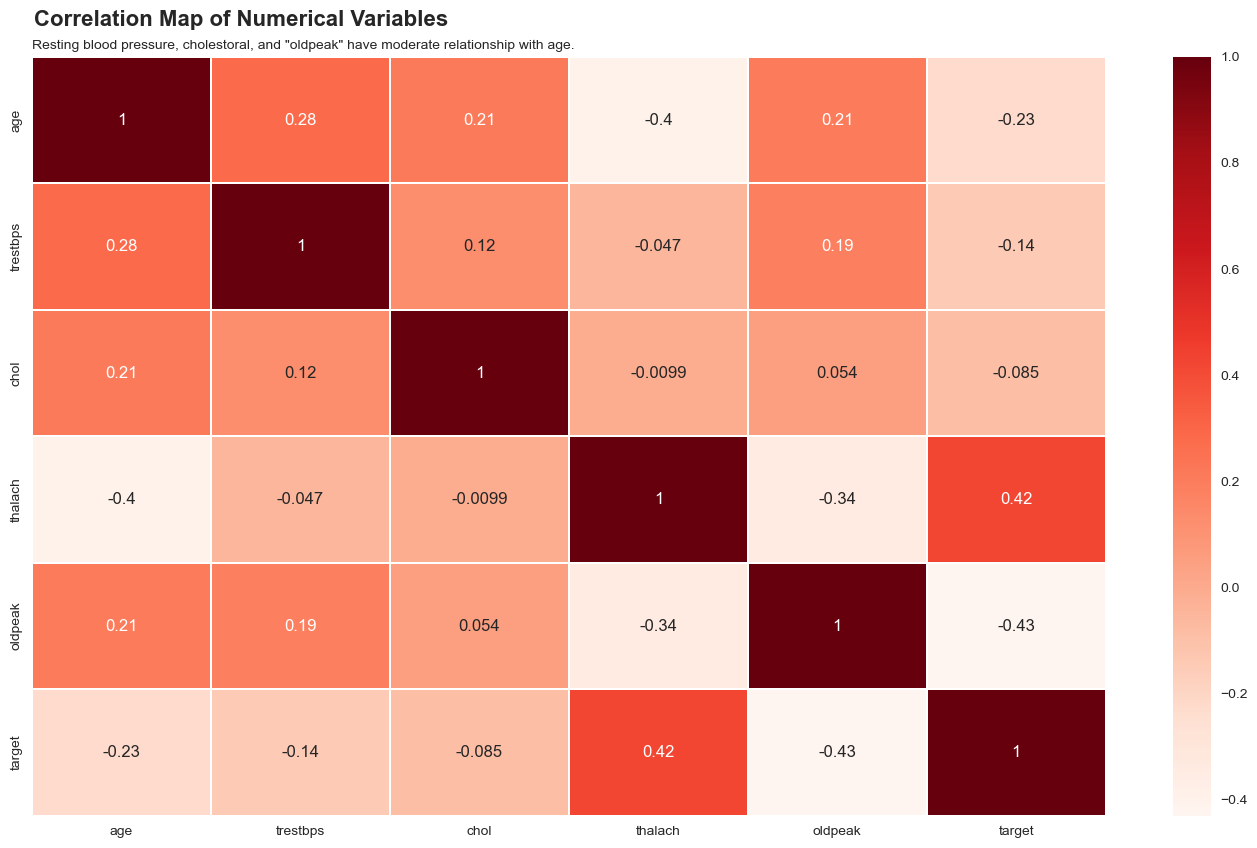

In [24]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [25]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(df['cp'], prefix='cp')
thal = pd.get_dummies(df['thal'], prefix='thal')
slope = pd.get_dummies(df['slope'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)

In [26]:
# --- Display New Data Frame ---
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [27]:
df = df.drop(columns = ['cp', 'thal', 'slope'])

In [28]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Flatten

In [30]:
from keras.layers import Embedding, Conv1D, MaxPooling1D,Bidirectional

In [31]:
df = pd.read_csv('CardioVascular.csv')
df = df.dropna()


In [32]:
train_data = df.sample(frac=0.8, random_state=0)
test_data = df.drop(train_data.index)

In [33]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

In [34]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


In [36]:
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=1, activation='sigmoid'))


In [37]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
cnn_history=cnn_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
8/8 [==============================] - 3s 72ms/step - loss: 0.6803 - accuracy: 0.5620 - val_loss: 0.6880 - val_accuracy: 0.5082
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6778 - accuracy: 0.5496 - val_loss: 0.6799 - val_accuracy: 0.5082
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6779 - accuracy: 0.5826 - val_loss: 0.6713 - val_accuracy: 0.5410
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6615 - accuracy: 0.6364 - val_loss: 0.6629 - val_accuracy: 0.6721
Epoch 5/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6598 - accuracy: 0.6942 - val_loss: 0.6552 - val_accuracy: 0.6885
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6566 - accuracy: 0.6157 - val_loss: 0.6475 - val_accuracy: 0.7049
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6510 - accuracy: 0.6446 - val_loss: 0.6374 - val_accuracy: 0.7049
Epoch 8/100
8/8 [===

8/8 [==============================] - 0s 14ms/step - loss: 0.4535 - accuracy: 0.7851 - val_loss: 0.4389 - val_accuracy: 0.7869
Epoch 60/100
8/8 [==============================] - 0s 14ms/step - loss: 0.4562 - accuracy: 0.7810 - val_loss: 0.4345 - val_accuracy: 0.7705
Epoch 61/100
8/8 [==============================] - 0s 14ms/step - loss: 0.4349 - accuracy: 0.8099 - val_loss: 0.4344 - val_accuracy: 0.7705
Epoch 62/100
8/8 [==============================] - 0s 13ms/step - loss: 0.4339 - accuracy: 0.7851 - val_loss: 0.4363 - val_accuracy: 0.7705
Epoch 63/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4279 - accuracy: 0.8099 - val_loss: 0.4358 - val_accuracy: 0.7705
Epoch 64/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4327 - accuracy: 0.8017 - val_loss: 0.4395 - val_accuracy: 0.7869
Epoch 65/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4365 - accuracy: 0.8099 - val_loss: 0.4377 - val_accuracy: 0.7705
Epoch 66/100
8/8 [========

In [39]:
cnn_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

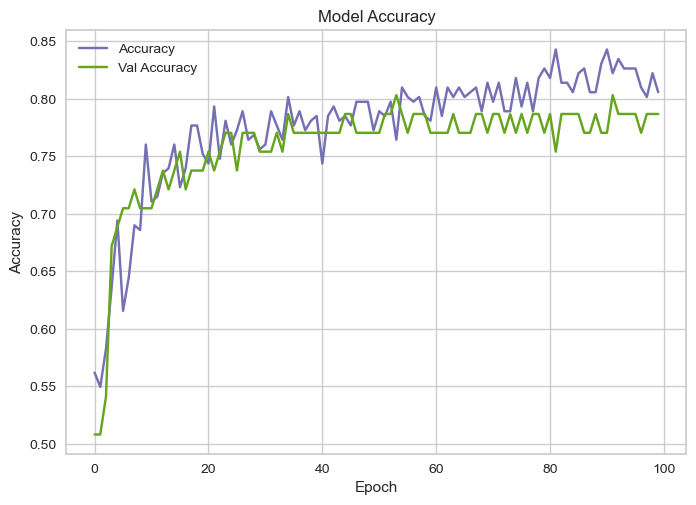

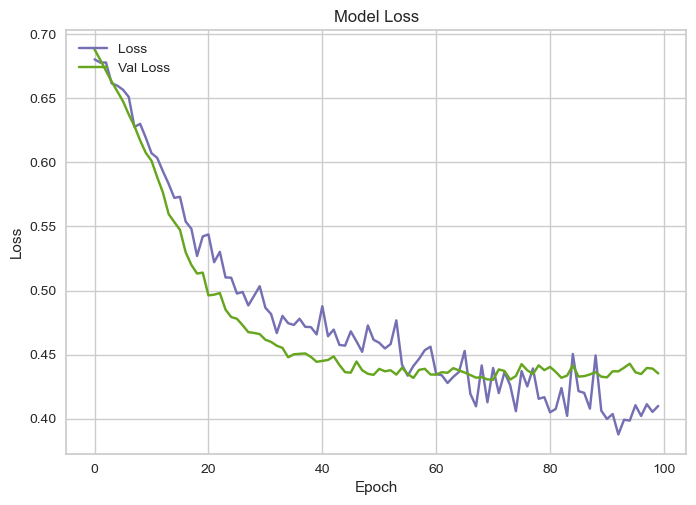

In [40]:
import matplotlib.pyplot as plt

# plot training and validation accuracy
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

# plot training and validation loss
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val Loss'], loc='upper left')
plt.show()

In [41]:
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(64,input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(1, activation='sigmoid'))

# compile the model
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
bi_lstm_history=bi_lstm_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))


Epoch 1/100
8/8 [==============================] - 11s 258ms/step - loss: 0.6941 - accuracy: 0.5041 - val_loss: 0.6965 - val_accuracy: 0.5082
Epoch 2/100
8/8 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.5455 - val_loss: 0.6951 - val_accuracy: 0.5082
Epoch 3/100
8/8 [==============================] - 0s 23ms/step - loss: 0.6906 - accuracy: 0.5496 - val_loss: 0.6974 - val_accuracy: 0.5082
Epoch 4/100
8/8 [==============================] - 0s 20ms/step - loss: 0.6869 - accuracy: 0.5537 - val_loss: 0.6992 - val_accuracy: 0.5082
Epoch 5/100
8/8 [==============================] - 0s 19ms/step - loss: 0.6892 - accuracy: 0.5537 - val_loss: 0.6963 - val_accuracy: 0.5082
Epoch 6/100
8/8 [==============================] - 0s 23ms/step - loss: 0.6894 - accuracy: 0.5579 - val_loss: 0.6948 - val_accuracy: 0.5082
Epoch 7/100
8/8 [==============================] - 0s 24ms/step - loss: 0.6817 - accuracy: 0.5620 - val_loss: 0.6924 - val_accuracy: 0.5082
Epoch 8/100
8/8 [=

8/8 [==============================] - 0s 20ms/step - loss: 0.5826 - accuracy: 0.7066 - val_loss: 0.5587 - val_accuracy: 0.7049
Epoch 60/100
8/8 [==============================] - 0s 22ms/step - loss: 0.5914 - accuracy: 0.6983 - val_loss: 0.5556 - val_accuracy: 0.7049
Epoch 61/100
8/8 [==============================] - 0s 22ms/step - loss: 0.5769 - accuracy: 0.6942 - val_loss: 0.5662 - val_accuracy: 0.7049
Epoch 62/100
8/8 [==============================] - 0s 23ms/step - loss: 0.5640 - accuracy: 0.7066 - val_loss: 0.5350 - val_accuracy: 0.7541
Epoch 63/100
8/8 [==============================] - 0s 19ms/step - loss: 0.6031 - accuracy: 0.6901 - val_loss: 0.5189 - val_accuracy: 0.7049
Epoch 64/100
8/8 [==============================] - 0s 18ms/step - loss: 0.5772 - accuracy: 0.6942 - val_loss: 0.5961 - val_accuracy: 0.6885
Epoch 65/100
8/8 [==============================] - 0s 18ms/step - loss: 0.5862 - accuracy: 0.7107 - val_loss: 0.5687 - val_accuracy: 0.6885
Epoch 66/100
8/8 [========

In [42]:
bi_lstm_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
cnn_acc=cnn_history.history['accuracy'][-1]
bi_lstm_acc=bi_lstm_history.history['accuracy'][-1]

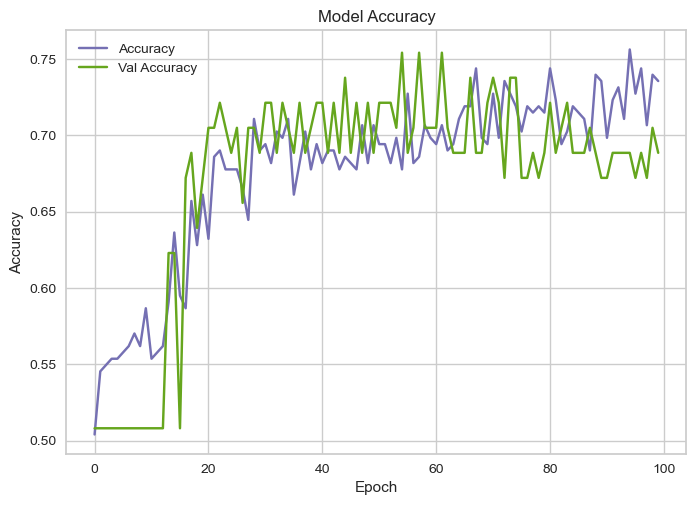

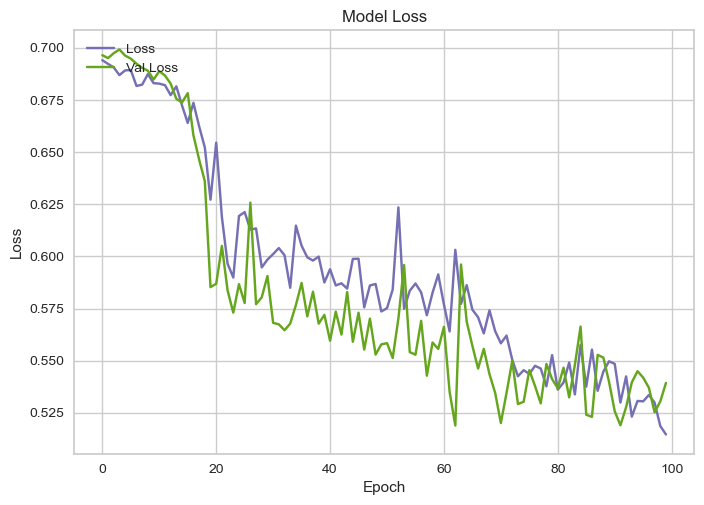

In [44]:
import matplotlib.pyplot as plt

# plot training and validation accuracy
plt.plot(bi_lstm_history.history['accuracy'])
plt.plot(bi_lstm_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

# plot training and validation loss
plt.plot(bi_lstm_history.history['loss'])
plt.plot(bi_lstm_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val Loss'], loc='upper left')
plt.show()

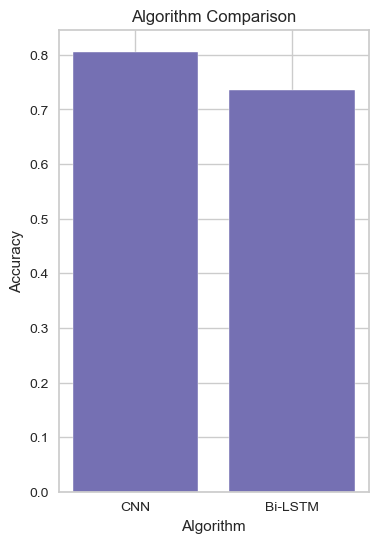

In [45]:
import matplotlib.pyplot as plt

# Step 1: Calculate accuracy of each algorithm
# Step 2: Create list of algorithm names and accuracy values
alg_names = ['CNN', 'Bi-LSTM']
accuracy_values = [cnn_acc,bi_lstm_acc]


# Step 3: Create bar chart
fig, ax = plt.subplots(figsize=(4,6))
ax.bar(alg_names, accuracy_values)

# Add labels and titles
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Algorithm Comparison')

plt.show()


In [46]:
cnn_model.save("CardioVascular.h5")